In [24]:
# prompt dictionary generator

all_prompt_dicts = []

# syntax is "write me a line [meter_prompts] including the word [seed_word][variations] "

meter_prompts = ["in iambic pentameter", "of blank verse", "in meter"]
variations = ["","with rhythmic variation", "with a trochaic inversion", "with a trochaic inversion after a caesura", "with an inverted foot", "with a trochaic inversion at the end of the line"]

word_list = ["sorrow", "lament", "truth", "lie", "love", "hate", "beginning", "ultimate", 'reason', 'deceit']

#this makes 90 prompts

for meter in meter_prompts:
  for variation in variations:
    for seed_word in word_list:
      # Change this line to define a dictionary
      possible_prompts = {"prompt": f"write a line {meter} including the word {seed_word} {variation}"}

      for key, value in possible_prompts.items():
        all_prompt_dicts.append({'meter': meter,  # Changed meter_prompt to meter
                                'variation': variation,
                                'seed_word': seed_word,
                                'prompt': value
                                                  })

In [25]:
display(all_prompt_dicts)



[{'meter': 'in iambic pentameter',
  'variation': '',
  'seed_word': 'sorrow',
  'prompt': 'write a line in iambic pentameter including the word sorrow '},
 {'meter': 'in iambic pentameter',
  'variation': '',
  'seed_word': 'lament',
  'prompt': 'write a line in iambic pentameter including the word lament '},
 {'meter': 'in iambic pentameter',
  'variation': '',
  'seed_word': 'truth',
  'prompt': 'write a line in iambic pentameter including the word truth '},
 {'meter': 'in iambic pentameter',
  'variation': '',
  'seed_word': 'lie',
  'prompt': 'write a line in iambic pentameter including the word lie '},
 {'meter': 'in iambic pentameter',
  'variation': '',
  'seed_word': 'love',
  'prompt': 'write a line in iambic pentameter including the word love '},
 {'meter': 'in iambic pentameter',
  'variation': '',
  'seed_word': 'hate',
  'prompt': 'write a line in iambic pentameter including the word hate '},
 {'meter': 'in iambic pentameter',
  'variation': '',
  'seed_word': 'beginning'

In [3]:
%pip install openai

import os
from openai import OpenAI


Note: you may need to restart the kernel to use updated packages.


In [27]:

import os
from openai import OpenAI

client = OpenAI(
    api_key=os.environ.get("OPENAI_API_KEY"),  # This is the default and can be omitted
)

# Assuming you have set your OpenAI API key

for prompt_dict in all_prompt_dicts:
    try:
        # Create completion using OpenAI API
        completion = client.chat.completions.create(
            model="gpt-4o",
            messages=[
                {"role": "system", "content": "You are a poetry assistant. Generate exactly one line of poetry based on the prompt."},
                {
                    "role": "user", 
                    "content": prompt_dict['prompt']}
            ]
        )
        
        # Extract the generated line and add it to the dictionary
        print(completion.choices[0].message.content.strip())
        prompt_dict['response'] = completion.choices[0].message.content.strip()
        all_prompt_dicts.append(prompt_dict)
        
    except Exception as e:
        print(f"Error processing prompt: {prompt_dict['prompt']}")
        print(f"Error message: {str(e)}")
        prompt_dict['response'] = "Error generating response"



In quiet dusk, the shadowed sorrow stirs.
Through whispered winds, our hearts in silence lament.
In whispered truths, the night reveals its song.
Amidst the stars, the whispered truths may lie.
In shadows deep, love finds its gentle flame.
Within the silent night, I taste your hate.
In whispers soft, the beginning unfolds anew.
In ultimate repose, the world now dreams.
Through reason’s light, we find the path to truth.
Beneath his smile, the seeds of deceit grow.
In whispers soft, the shadowed sorrow sings.
Beneath the stars, her soft lament was sung.
In whispers, truth unveils its quiet grace.
Upon the fall of night, the stars lie bright.
In fleeting dreams where love and shadows play,
Against the ebb and flow of endless hate.
In whispered dawn, beginning dreams ignite.
The ultimate dream lies beyond the sky's glow.
Beneath the stars, reason whispers in dreams.
Through shifting shadows danced a veil, deceit.
Sorrow’s weight, it grips the heart with tender force.
Lament the whispered w

KeyboardInterrupt: 

In [28]:
all_prompt_dicts


[{'meter': 'in iambic pentameter',
  'variation': '',
  'seed_word': 'sorrow',
  'prompt': 'write a line in iambic pentameter including the word sorrow ',
  'response': 'In whispered tones, the sorrow softly weeps.'},
 {'meter': 'in iambic pentameter',
  'variation': '',
  'seed_word': 'lament',
  'prompt': 'write a line in iambic pentameter including the word lament ',
  'response': 'Through silent woods, the wind lays down a lament.'},
 {'meter': 'in iambic pentameter',
  'variation': '',
  'seed_word': 'truth',
  'prompt': 'write a line in iambic pentameter including the word truth ',
  'response': 'The subtle truth unfolds in whispered light.'},
 {'meter': 'in iambic pentameter',
  'variation': '',
  'seed_word': 'lie',
  'prompt': 'write a line in iambic pentameter including the word lie ',
  'response': 'In whispered dreams, the silent shadows lie.'},
 {'meter': 'in iambic pentameter',
  'variation': '',
  'seed_word': 'love',
  'prompt': 'write a line in iambic pentameter includ

In [34]:
import pandas as pd

# Convert the list of dictionaries to a DataFrame
df_prompts = pd.DataFrame(all_prompt_dicts)

# Display the DataFrame
df_prompts
df_prompts.to_csv('prompt_responses.csv', index=False)

In [40]:
import pandas as pd
import prosodic

# Read the "response" column of "prompt_responses" and add the output to the CSV

prosodic.logger.setLevel('ERROR')

# Load the prompt_responses DataFrame
prompt_responses = pd.read_csv('/Users/bsg25/Library/CloudStorage/OneDrive-YaleUniversity/TrochAIc/prompt_responses.csv')  # Replace with your file path

# Set meter
constraints = {
    'w_peak': 2.0,
    'w_stress': 1.0,
    's_unstress': 1.0,
    'unres_across': 1.0,
    'unres_within': 0.0,
    'pentameter': 10.0,
    'iambic': 10.0,
}
meter = prosodic.Meter(
    constraints=constraints,
    resolve_optionality=True,
    max_s=1,
    max_w=2,
)

# Create an empty DataFrame with the desired column headers
column_headers = ["line_txt", "txt", "meter", "stress", "score", "num_viols", "ambig"]
df = pd.DataFrame(columns=column_headers)

# Loop through the "response" column of prompt_responses and add data to DataFrame
for response in prompt_responses['response']:
    response = response.strip()  # Remove leading/trailing whitespace

    response = prosodic.Text(response)  # Process with prosodic.Text()
    parses = response.parse()
    parse_dict = parses[0].best_parse.attrs

    # Extract data from the first parse (modify if you need data from other parses)
    new_dict = {key: parse_dict[key] for key in column_headers if key in parse_dict}

    # Append data to DataFrame
    df = pd.concat([df, pd.DataFrame([new_dict])], ignore_index=True)

# Merge the new DataFrame with the original prompt_responses DataFrame
merged_df = prompt_responses.merge(df, left_on='response', right_on='line_txt', how='left')

# Display the merged DataFrame
merged_df

# Save the merged DataFrame to a CSV file
merged_df.to_csv('/Users/bsg25/Library/CloudStorage/OneDrive-YaleUniversity/TrochAIc/AI Verse/merged_prompt_responses.csv', index=False)  # Replace with your output file path

In [38]:
merged_df = merged_df.drop_duplicates()



In [39]:
# Merge the new DataFrame with the original prompt_responses DataFrame
#merged_df = prompt_responses.merge(df, left_on='response', right_on='line_txt', how='left')

# Display the merged DataFrame


# Save the merged DataFrame to a CSV file
merged_df.to_csv('/Users/bsg25/Library/CloudStorage/OneDrive-YaleUniversity/TrochAIc/AI Verse/merged_prompt_responses.csv', index=False)  # Replace with your output file path

In [68]:
newdf

,meter_x,variation,seed_word,prompt,response,line_txt,txt,meter_y,stress,score,num_viols,ambig
0,in iambic pentameter,NaN,sorrow,write a line in iambic pentameter including th...,"In whispered tones, the sorrow softly weeps.","In whispered tones, the sorrow softly weeps.",in WHIS pered TONES the SOR row SOF tly WEEPS,-+-+-+-+-+,-+-+-+-+-+,0.0,0.0,1.0
1,in iambic pentameter,NaN,lament,write a line in iambic pentameter including th...,"Through silent woods, the wind lays down a lam...","Through silent woods, the wind lays down a lam...",through SI lent WOODS the WIND.LAYS down A la ...,-+-+-++-+-+,-+-+-++---+,2.0,2.0,5.0
2,in iambic pentameter,NaN,truth,write a line in iambic pentameter including th...,The subtle truth unfolds in whispered light.,The subtle truth unfolds in whispered light.,the SUB tle TRUTH un FOLDS in WHIS pered LIGHT,-+-+-+-+-+,-+-+-+-+-+,0.0,0.0,1.0
3,in iambic pentameter,NaN,lie,write a line in iambic pentameter including th...,"In whispered dreams, the silent shadows lie.","In whispered dreams, the silent shadows lie.",in WHIS pered DREAMS the SI lent SHA dows LIE,-+-+-+-+-+,-+-+-+-+++,1.0,1.0,2.0
4,in iambic pentameter,NaN,love,write a line in iambic pentameter including th...,"In love's embrace, we find the world's delight.","In love's embrace, we find the world's delight.",in LOVE'S em BRACE we FIND the WORLD'S de LIGHT,-+-+-+-+-+,-+-+-+-+-+,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
175,in meter,with a trochaic inversion at the end of the line,hate,write a line in meter including the word hate ...,"In the wind's call, whispers love, yet storms ...","In the wind's call, whispers love, yet storms ...",in.the WIND'S call WHIS pers LOVE yet STORMS b...,--+-+-+-+-+-+,--+++-+-+++-+,2.0,2.0,4.0
176,in meter,with a trochaic inversion at the end of the line,beginning,write a line in meter including the word begin...,"Upon the dusk, a whispering breeze of night, a...","Upon the dusk, a whispering breeze of night, a...",u PON the DUSK a WHIS pe.ring BREEZE of NIGHT ...,-+-+-+--+-+-+-+-,-+-+-+--+-+-+-+-,1.0,1.0,3.0
177,in meter,with a trochaic inversion at the end of the line,ultimate,write a line in meter including the word ultim...,"Through the twilight, ultimate dreams arise anew.","Through the twilight, ultimate dreams arise anew.",through.the TWI light UL ti.mate DREAMS a RISE...,--+-+--+-+-+,--+++--+-+-+,2.0,2.0,5.0
178,in meter,with a trochaic inversion at the end of the line,reason,write a line in meter including the word reaso...,"Amidst the silent night, the stars bring reaso...","Amidst the silent night, the stars bring reaso...",a MIDST the SI lent NIGHT the STARS bring REA ...,-+-+-+-+-+-+,-+-+-+-+++-+,1.0,1.0,1.0


In [72]:
newdf


,Answer
0,with a trochaic inversion
1,with a trochaic inversion after a caesura
2,with a trochaic inversion at the end of the line
3,with an inverted foot
4,with rhythmic variation


In [81]:
newdf = pd.read_csv('/Users/bsg25/Library/CloudStorage/OneDrive-YaleUniversity/TrochAIc/parsed_AI_180lines.csv')
newdf

,meter_x,variation,seed_word,prompt,response,line_txt,txt,meter_y,stress,score,num_viols,ambig
0,in iambic pentameter,NaN,sorrow,write a line in iambic pentameter including th...,"In whispered tones, the sorrow softly weeps.","In whispered tones, the sorrow softly weeps.",in WHIS pered TONES the SOR row SOF tly WEEPS,-+-+-+-+-+,-+-+-+-+-+,0.0,0.0,1.0
1,in iambic pentameter,NaN,lament,write a line in iambic pentameter including th...,"Through silent woods, the wind lays down a lam...","Through silent woods, the wind lays down a lam...",through SI lent WOODS the WIND.LAYS down A la ...,-+-+-++-+-+,-+-+-++---+,2.0,2.0,5.0
2,in iambic pentameter,NaN,truth,write a line in iambic pentameter including th...,The subtle truth unfolds in whispered light.,The subtle truth unfolds in whispered light.,the SUB tle TRUTH un FOLDS in WHIS pered LIGHT,-+-+-+-+-+,-+-+-+-+-+,0.0,0.0,1.0
3,in iambic pentameter,NaN,lie,write a line in iambic pentameter including th...,"In whispered dreams, the silent shadows lie.","In whispered dreams, the silent shadows lie.",in WHIS pered DREAMS the SI lent SHA dows LIE,-+-+-+-+-+,-+-+-+-+++,1.0,1.0,2.0
4,in iambic pentameter,NaN,love,write a line in iambic pentameter including th...,"In love's embrace, we find the world's delight.","In love's embrace, we find the world's delight.",in LOVE'S em BRACE we FIND the WORLD'S de LIGHT,-+-+-+-+-+,-+-+-+-+-+,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
175,in meter,with a trochaic inversion at the end of the line,hate,write a line in meter including the word hate ...,"In the wind's call, whispers love, yet storms ...","In the wind's call, whispers love, yet storms ...",in.the WIND'S call WHIS pers LOVE yet STORMS b...,--+-+-+-+-+-+,--+++-+-+++-+,2.0,2.0,4.0
176,in meter,with a trochaic inversion at the end of the line,beginning,write a line in meter including the word begin...,"Upon the dusk, a whispering breeze of night, a...","Upon the dusk, a whispering breeze of night, a...",u PON the DUSK a WHIS pe.ring BREEZE of NIGHT ...,-+-+-+--+-+-+-+-,-+-+-+--+-+-+-+-,1.0,1.0,3.0
177,in meter,with a trochaic inversion at the end of the line,ultimate,write a line in meter including the word ultim...,"Through the twilight, ultimate dreams arise anew.","Through the twilight, ultimate dreams arise anew.",through.the TWI light UL ti.mate DREAMS a RISE...,--+-+--+-+-+,--+++--+-+-+,2.0,2.0,5.0
178,in meter,with a trochaic inversion at the end of the line,reason,write a line in meter including the word reaso...,"Amidst the silent night, the stars bring reaso...","Amidst the silent night, the stars bring reaso...",a MIDST the SI lent NIGHT the STARS bring REA ...,-+-+-+-+-+-+,-+-+-+-+++-+,1.0,1.0,1.0


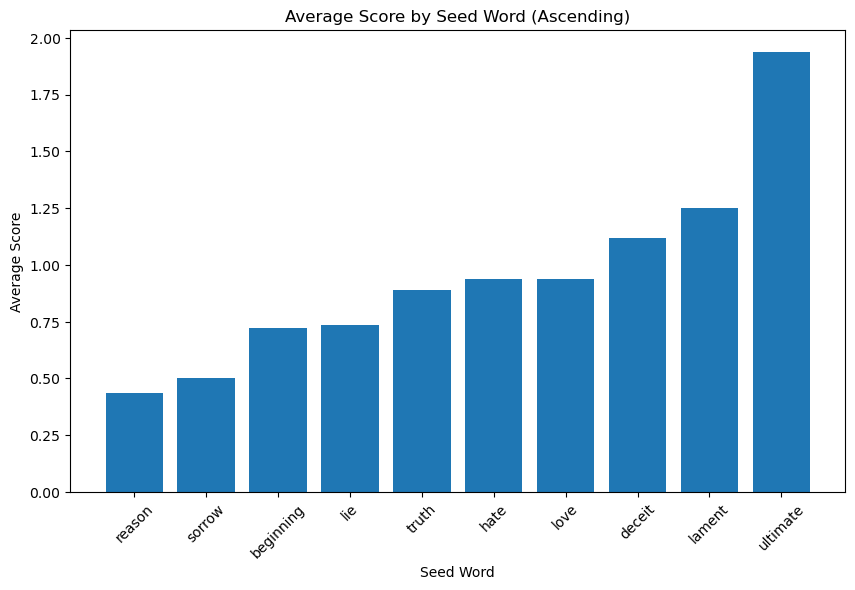

In [86]:
import matplotlib.pyplot as plt
# Group by 'seed_word' and calculate the mean score, then sort by score
newdf_grouped = newdf_clean.groupby('seed_word')['score'].mean().reset_index().sort_values(by='score')
# Plotting the results
plt.figure(figsize=(10, 6))
plt.bar(newdf_grouped['seed_word'], newdf_grouped['score'])
plt.xlabel('Seed Word')
plt.ylabel('Average Score')
plt.title('Average Score by Seed Word (Ascending)')
plt.xticks(rotation=45)
plt.show()

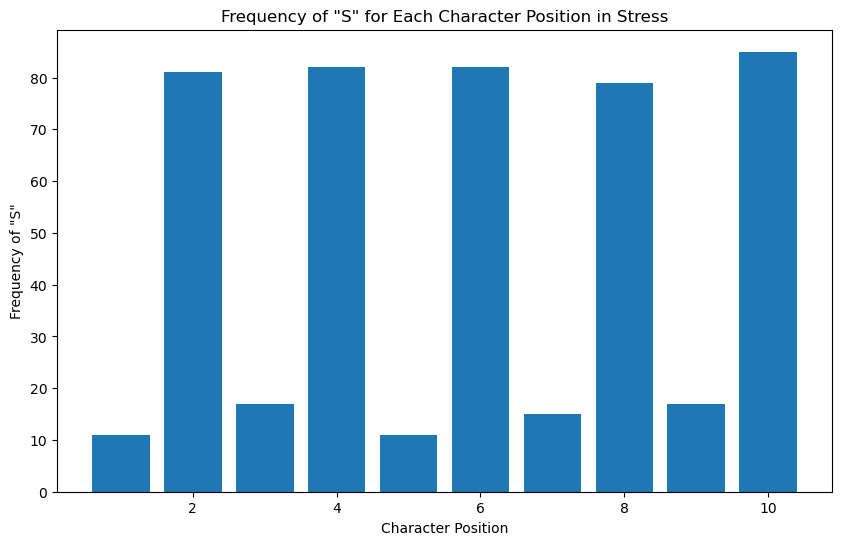

In [88]:
import matplotlib.pyplot as plt
# Filter rows where meter_y has length 10
newdf_clean = newdf_clean[newdf_clean['meter_y'].str.len() == 10]
# Calculate frequency of "S" for each character position in 'stress'
newdf_clean['stress'] = newdf_clean['stress'].astype(str)
frequency = newdf_clean['stress'].apply(lambda x: pd.Series(list(x))).apply(lambda x: (x == 'S').sum(), axis=0)
# Create a new DataFrame with the result, index starting at 1
newdf_frequency = pd.DataFrame({'Frequency': frequency})
newdf_frequency.index = newdf_frequency.index + 1
# Plotting the results
plt.figure(figsize=(10, 6))
plt.bar(newdf_frequency.index, newdf_frequency['Frequency'])
plt.xlabel('Character Position')
plt.ylabel('Frequency of "S"')
plt.title('Frequency of "S" for Each Character Position in Stress')
plt.show()

In [82]:
"""
Cell generated by Data Wrangler.
"""
def clean_data(newdf):
    # Replace - with W and + with S in meter_y and stress
    newdf['meter_y'] = newdf['meter_y'].str.replace('-', 'W').str.replace('+', 'S')
    newdf['stress'] = newdf['stress'].str.replace('-', 'W').str.replace('+', 'S')
    # Replace missing values in 'variation' with "None"
    newdf['variation'].fillna("None", inplace=True)
    # Delete rows with missing values
    newdf = newdf.dropna()

    return newdf

newdf_clean = clean_data(newdf.copy())
newdf_clean.head()

,meter_x,variation,seed_word,prompt,response,line_txt,txt,meter_y,stress,score,num_viols,ambig
0,in iambic pentameter,None,sorrow,write a line in iambic pentameter including th...,"In whispered tones, the sorrow softly weeps.","In whispered tones, the sorrow softly weeps.",in WHIS pered TONES the SOR row SOF tly WEEPS,WSWSWSWSWS,WSWSWSWSWS,0.0,0.0,1.0
1,in iambic pentameter,None,lament,write a line in iambic pentameter including th...,"Through silent woods, the wind lays down a lam...","Through silent woods, the wind lays down a lam...",through SI lent WOODS the WIND.LAYS down A la ...,WSWSWSSWSWS,WSWSWSSWWWS,2.0,2.0,5.0
2,in iambic pentameter,None,truth,write a line in iambic pentameter including th...,The subtle truth unfolds in whispered light.,The subtle truth unfolds in whispered light.,the SUB tle TRUTH un FOLDS in WHIS pered LIGHT,WSWSWSWSWS,WSWSWSWSWS,0.0,0.0,1.0
3,in iambic pentameter,None,lie,write a line in iambic pentameter including th...,"In whispered dreams, the silent shadows lie.","In whispered dreams, the silent shadows lie.",in WHIS pered DREAMS the SI lent SHA dows LIE,WSWSWSWSWS,WSWSWSWSSS,1.0,1.0,2.0
4,in iambic pentameter,None,love,write a line in iambic pentameter including th...,"In love's embrace, we find the world's delight.","In love's embrace, we find the world's delight.",in LOVE'S em BRACE we FIND the WORLD'S de LIGHT,WSWSWSWSWS,WSWSWSWSWS,0.0,0.0,1.0


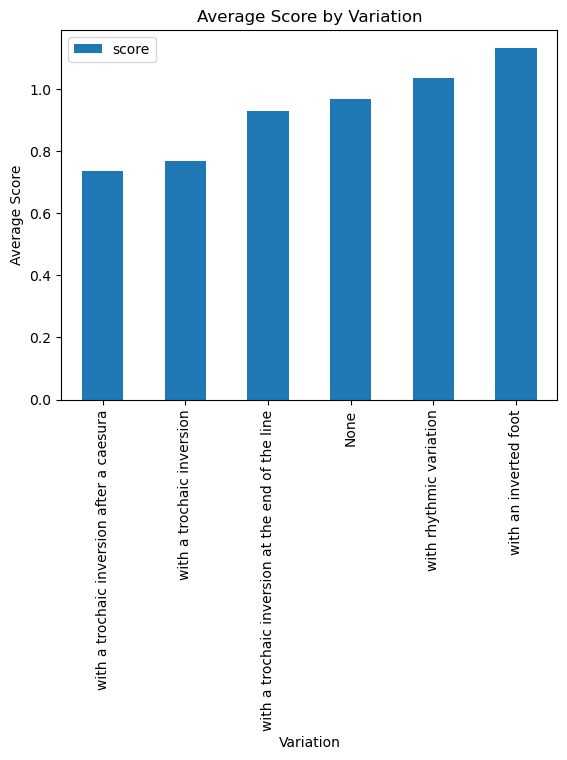

In [76]:
import matplotlib.pyplot as plt
# Group by 'variation' including None, calculate mean score, and sort by score
newdf = newdf.groupby(newdf['variation'].fillna('None'))['score'].mean().sort_values().reset_index()
# Plot the results
newdf.plot(kind='bar', x='variation', y='score')
plt.xlabel('Variation')
plt.ylabel('Average Score')
plt.title('Average Score by Variation')
plt.show()

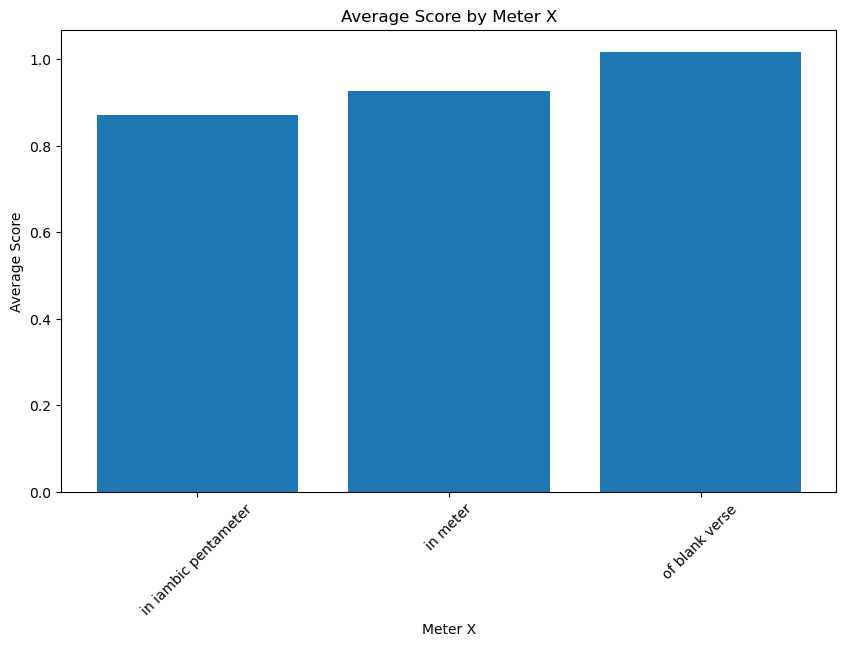

In [84]:
import matplotlib.pyplot as plt
# Group by 'meter_x' and calculate the mean score
newdf = newdf_clean.groupby('meter_x')['score'].mean().reset_index()
# Plotting the results
plt.figure(figsize=(10, 6))
plt.bar(newdf['meter_x'], newdf['score'])
plt.xlabel('Meter X')
plt.ylabel('Average Score')
plt.title('Average Score by Meter X')
plt.xticks(rotation=45)
plt.show()